---
jupyter: python3
---

**CSI 4506 Introduction à l'intelligence artificielle** <br/>
*Devoir 2 : Santé des animaux de compagnie extra-terrestres, apprentissage automatique*

# Identification

Nom : Anass Benharbit<br/>
Numéro d'étudiant : 300324339

## 1. Données

Le devoir 2 inclut deux versions du même jeu de données : l'une contenant des valeurs manquantes et l'autre sans. La version avec des valeurs manquantes a été dérivée du jeu de données complet :

- [github.com/turcotte/csi4106-f25/tree/main/assignments-data/a2](https://github.com/turcotte/csi4106-f25/tree/main/assignments-data/a2)

Dans votre cahier, vous pouvez accéder et lire les données directement depuis ce dépôt GitHub.

- [alien_pet_health-realism-clean.csv](https://raw.githubusercontent.com/turcotte/csi4106-f25/main/assignments-data/a2/alien_pet_health-realism-clean.csv)
- [alien_pet_health-realism-clean-missing.csv](https://raw.githubusercontent.com/turcotte/csi4106-f25/main/assignments-data/a2/alien_pet_health-realism-clean-missing.csv)

## 2. Tâches

Les tâches sont organisées dans un ordre particulier pour maintenir la concision et la clarté. Il y a de la flexibilité dans la structure de votre code. Améliorez son organisation en ajoutant des cellules de code si nécessaire. Vous pouvez modifier l'ordre des tâches ; par exemple, vous pourriez choisir de définir des méthodes auxiliaires au début. Néanmoins, il est crucial que l'assistant d'enseignement puisse identifier facilement les segments de code associés à chaque tâche.

(1) **Charger le jeu de données**

- Lire le fichier CSV sans données manquantes (`alien_pet_health-realism-clean.csv`).

- Afficher la forme (*shape*) des données, ainsi que les cinq premières lignes.

In [7]:
import pandas as pd

# URL du fichier sans valeurs manquantes
url_propre = "https://raw.githubusercontent.com/turcotte/csi4106-f25/main/assignments-data/a2/alien_pet_health-realism-clean.csv"

# Charger les données
df = pd.read_csv(url_propre)

# Afficher la forme et les 5 premières lignes
print("Shape :", df.shape)
print(df.head())

Shape : (5000, 8)
   thermoreg_reading  enzyme_activity_index  dual_lobe_signal  \
0               52.6                   97.0               3.6   
1               41.8                  105.0               3.4   
2               56.2                  126.0               5.5   
3               57.7                  106.0              -4.1   
4               34.5                   73.0               2.3   

   stress_variability habitat_zone  activity_score  fasting_flag  \
0                -3.5           c2               2             0   
1                10.5           c1               2             0   
2                 9.6           c2               5             0   
3                -4.0           c1               4             0   
4                 0.3           c4               5             1   

   health_outcome  
0               1  
1               0  
2               0  
3               1  
4               1  


(2) **Analyse de la distribution des attributs** :

- Pour identifier la méthode de codage appropriée pour chaque attribut, il est utile d'examiner leurs distributions à l'aide d'outils de visualisation tels que les histogrammes. Cette analyse permettra de prendre des décisions basées sur les données concernant les stratégies de codage appropriées.

Colonnes numériques : ['thermoreg_reading', 'enzyme_activity_index', 'dual_lobe_signal', 'stress_variability', 'activity_score', 'fasting_flag', 'health_outcome']
Colonnes catégorielles : ['habitat_zone']


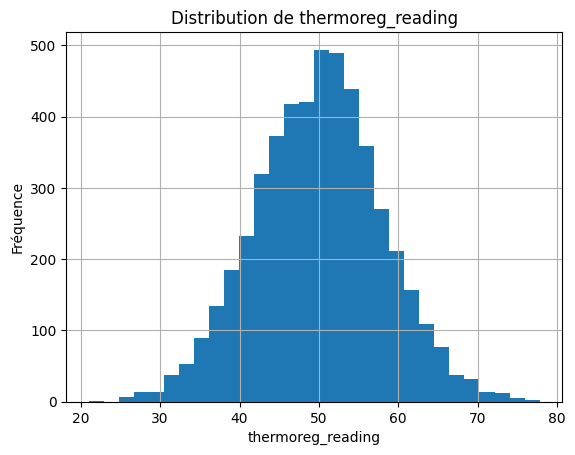

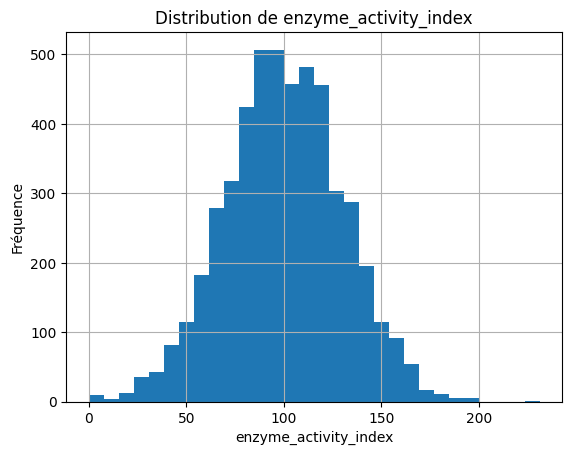

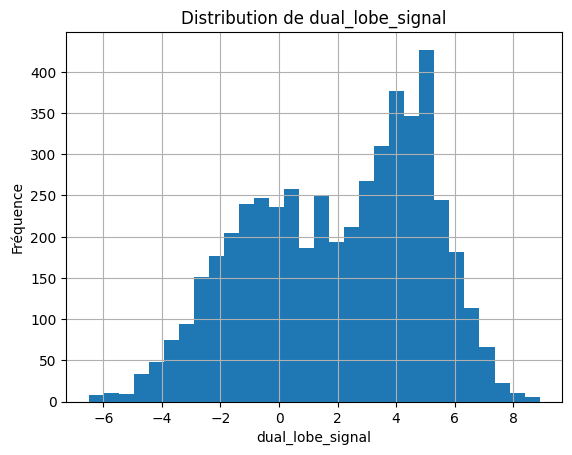

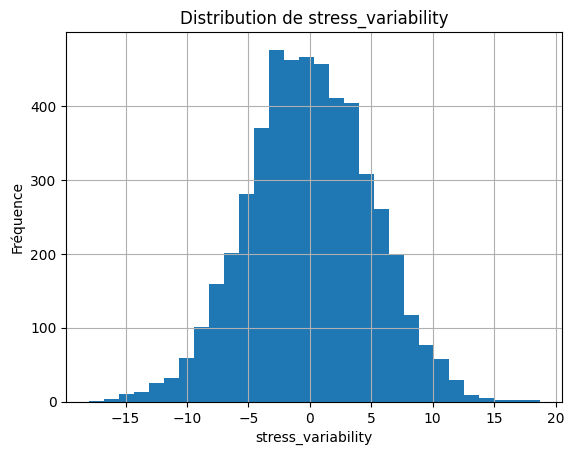

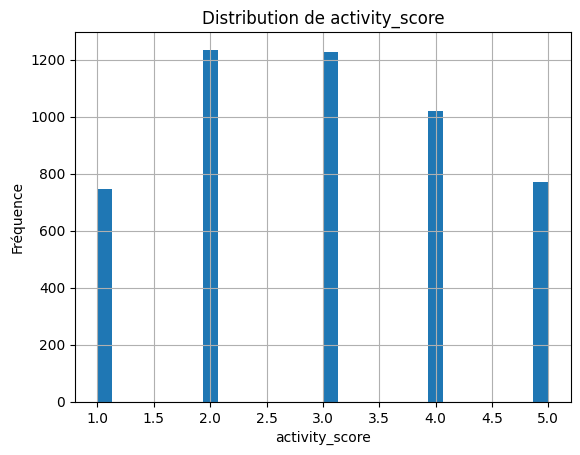

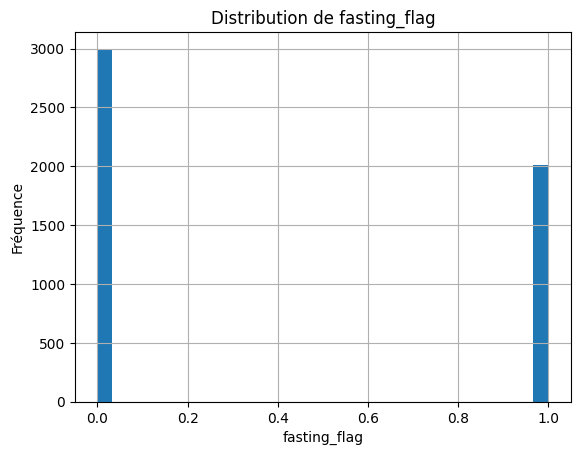

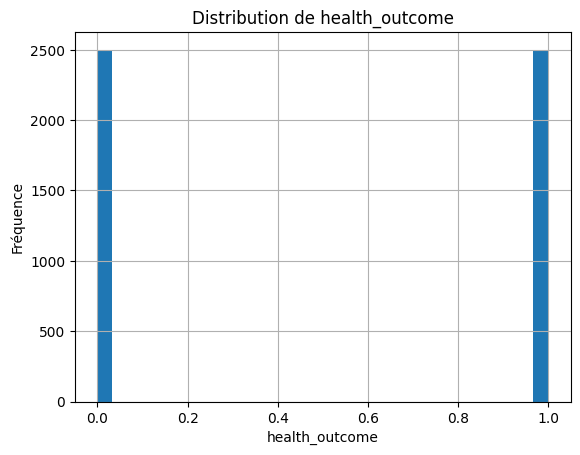

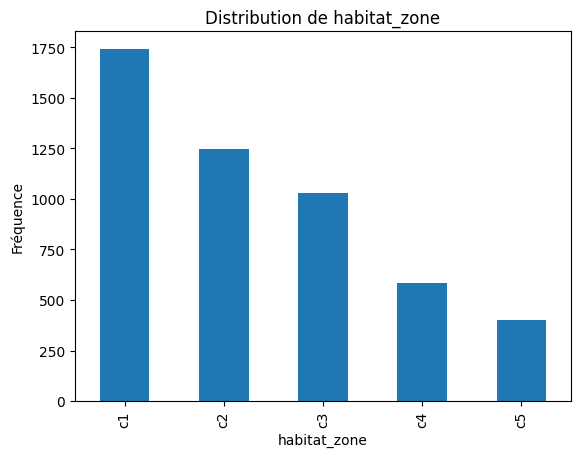

In [8]:
import matplotlib.pyplot as plt

# Séparer les colonnes numériques et catégorielles
num_col = df.select_dtypes(include=['int64', 'float64']).columns
cat_col = df.select_dtypes(include=['object']).columns

print("Colonnes numériques :", list(num_col))
print("Colonnes catégorielles :", list(cat_col))

# Histogrammes pour les colonnes numériques
for col in num_col:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.show()

# Diagrammes en barres pour les colonnes catégorielles
for col in cat_col:
    plt.figure()
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.show()


(3) **Données d'entraînement et cible** :

- Pour chaque jeu de données, définir des variables Python, telles que `X` pour les données et `y` pour la classe cible.

In [9]:
# Dataset propre
X_propre = df.drop(columns=["health_outcome"])
y_propre = df["health_outcome"]

print("dataset propre  |  X:", X_propre.shape, " y:", y_propre.shape)

# dataset avec valeurs manquantes
url_manquante = "https://raw.githubusercontent.com/turcotte/csi4106-f25/main/assignments-data/a2/alien_pet_health-realism-clean-missing.csv"
df_manquante = pd.read_csv(url_manquante)

X_manquante = df_manquante.drop(columns=["health_outcome"])
y_manquante = df_manquante["health_outcome"]

print("Dataset avec données manquante  |  X:", X_manquante.shape, " y:", y_manquante.shape)


dataset propre  |  X: (5000, 7)  y: (5000,)
Dataset avec données manquante  |  X: (5000, 7)  y: (5000,)


(4) **Division des données** :

- Diviser le jeu de données en ensembles d'entraînement (80%) et de test (20%) en utilisant la méthode de la réserve (*hold out*).

- S'assurer que cette division se produit avant tout prétraitement pour éviter toute fuite de données.

In [ ]:
from sklearn.model_selection import train_test_split

# Division des données (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_propre, y_propre,
    test_size=0.2,
    random_state=42,
    stratify=y_propre  # assure la meme proportion de classes dans train et test
)

print("Shape X_train:", X_train.shape)
print("Shape X_test :", X_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test :", y_test.shape)


Shape X_train: (4000, 7)
Shape X_test : (1000, 7)
Shape y_train: (4000,)
Shape y_test : (1000,)


### Prétraitement des données

(5) **Codage des variables catégorielles** :

- Transformer toutes les variables catégoriques en utilisant des techniques de codage appropriées disponibles dans [sklearn.preprocessing](https://scikit-learn.org/stable/api/sklearn.preprocessing.html). Pour plus de conseils, consultez la section [Prétraitement des Données](https://scikit-learn.org/stable/modules/preprocessing.html) du guide de l'utilisateur. Fournir une justification pour la méthode de codage sélectionnée.

Justification : J’ai choisi OneHotEncoder parce que ça permet de transformer les catégories en colonnes avec des 0 et des 1. donc les modèles peuvent comprendre les informations sans qu’il y ait d’ordre faux entre les catégories.

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Colonnes catégorielles
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# One-Hot encodage des catégorielles
ohe = OneHotEncoder(sparse_output=False)

enc_cat = ColumnTransformer(
    transformers=[('cat', ohe, cat_cols)],
    remainder='passthrough',
    verbose_feature_names_out=False
)

# Fit sur train uniquement, puis transform train et test
enc_cat.fit(X_train)
X_train_enc = enc_cat.transform(X_train)
X_test_enc  = enc_cat.transform(X_test)


(6) **Normalisation/standardisation des attributs numériques** :

- Normaliser ou standardiser les attributs numériques si nécessaire. Décrire la technique utilisée (par exemple, échelle Min-Max, StandardScaler) et expliquer pourquoi elle convient à ce jeu de données.

- S'assurer que cette technique est appliquée uniquement aux données d'entraînement, avec la même transformation appliquée ultérieurement aux données de test sans l'ajuster sur elles.

Justification : j’utilise StandardScaler (z-score) pour mettre les variables numériques sur la même échelle. C’est utile pour éviter que des features à grande amplitude dominent les autres, surtout pour les modèles sensibles aux échelles.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Colonnes numériques
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Standardisation
scaler = StandardScaler()
scaler.fit(X_train[num_cols])

X_train_std = X_train.copy()
X_test_std  = X_test.copy()

X_train_std[num_cols] = scaler.transform(X_train[num_cols])
X_test_std[num_cols]  = scaler.transform(X_test[num_cols])


### Développement et évaluation du modèle

(7) **Développement de modèles** :

- Implémenter les modèles d'apprentissage automatique couverts en classe : K-Nearest Neighbors (KNN), Arbres de Décision, et Régression Logistique, ainsi que la Forêt Aléatoire. Utiliser les paramètres par défaut de scikit-learn comme base pour l'entraînement de chaque modèle.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Préparer les matrices finales
X_train_ready = enc_cat.transform(X_train_std)
X_test_ready  = enc_cat.transform(X_test_std)

# Modèles avec paramètres par défaut
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier()
logreg = LogisticRegression()
forest = RandomForestClassifier()

# Entraînement
knn.fit(X_train_ready, y_train)
tree.fit(X_train_ready, y_train)
logreg.fit(X_train_ready, y_train)
forest.fit(X_train_ready, y_train)

print("Modèles entraînés")

Modèles entraînés


(8) **Évaluation des modèles** :

- Utiliser la validation croisée pour évaluer chaque modèle, en justifiant votre choix du nombre de plis.

- Évaluer les modèles en utilisant des métriques telles que la précision, le rappel, et le score F1.

In [26]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Liste des modèles
modeles = [
    ("K plus proches voisins", knn),
    ("Arbre de décision", tree),
    ("Régression logistique", logreg),
    ("Forêt aléatoire", forest)
]

# Validation croisée à 5 plis
for nom, modele in modeles:
    exactitude = cross_val_score(modele, X_train_ready, y_train, cv=5, scoring='accuracy')
    precision  = cross_val_score(modele, X_train_ready, y_train, cv=5, scoring='precision_macro')
    rappel     = cross_val_score(modele, X_train_ready, y_train, cv=5, scoring='recall_macro')
    f1         = cross_val_score(modele, X_train_ready, y_train, cv=5, scoring='f1_macro')

    print(f"\n{nom} :")
    print("  Exactitude :", np.mean(exactitude))
    print("  Précision  :", np.mean(precision))
    print("  Rappel     :", np.mean(rappel))
    print("  Score F1   :", np.mean(f1))



K plus proches voisins :
  Exactitude : 0.8262499999999999
  Précision  : 0.8276881227941477
  Rappel     : 0.8262541422133888
  Score F1   : 0.8260667422953321

Arbre de décision :
  Exactitude : 0.8012499999999999
  Précision  : 0.8051481916071653
  Rappel     : 0.8079959968499804
  Score F1   : 0.8089918861659544

Régression logistique :
  Exactitude : 0.68825
  Précision  : 0.6912923920866484
  Rappel     : 0.6882633313333208
  Score F1   : 0.6870990674015268

Forêt aléatoire :
  Exactitude : 0.85725
  Précision  : 0.8590361224556691
  Rappel     : 0.8567417015106346
  Score F1   : 0.854476319398262


### Optimisation des hyperparamètres

(9) **Exploration et évaluation des performances :**

- Étudier l'impact de la variation des valeurs des hyperparamètres sur les performances de chaque modèle.

- Pour chaque modèle, s'assurer de faire varier au moins les hyperparamètres suivants :

    - [KNeighborsClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html):`n_neighbors` et `weights`.

    - [DecisionTreeClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html):`criterion` et `max_depth`.
  
    - [LogisticRegression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html):`penalty`, `max_iter`, et `tol`.

    - [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html):`n_estimators`, `max_depth`.

- Utiliser une stratégie de recherche en grille ou utiliser les méthodes intégrées de scikit-learn pour évaluer minutieusement toutes les combinaisons de valeurs d'hyperparamètres. La validation croisée doit être utilisée pour évaluer chaque combinaison.

- Quantifier la performance de chaque configuration d'hyperparamètres en utilisant la précision, le rappel, et le score F1 comme métriques. Rapporter à la fois la moyenne et l'écart-type.

- Présenter les résultats sous un format tabulaire ou graphique (par exemple, graphiques en ligne, graphiques à barres) pour démontrer efficacement l'influence des variations d'hyperparamètres sur les performances du modèle.

- Spécifier les valeurs par défaut pour chaque hyperparamètre testé.

- Analyser les résultats et offrir des perspectives sur quelles configurations d'hyperparamètres ont atteint des performances optimales pour chaque modèle.

Valeurs par défaut : {'KNN': {'n_neighbors': 5, 'weights': 'uniform'}, 'Arbre de décision': {'criterion': 'gini', 'max_depth': None}, 'Régression logistique': {'penalty': 'l2', 'max_iter': 100, 'tol': 0.0001}, 'Forêt aléatoire': {'n_estimators': 100, 'max_depth': None}}

KNN — meilleures configurations (top 5) :
   param_n_neighbors param_weights  mean_test_accuracy  std_test_accuracy  \
5                  7      distance             0.82725           0.010994   
3                  5      distance             0.82625           0.010548   
2                  5       uniform             0.82625           0.008139   
4                  7       uniform             0.82350           0.011107   
1                  3      distance             0.81450           0.011308   

   mean_test_precision_macro  std_test_precision_macro  \
5                   0.829001                  0.010976   
3                   0.827657                  0.010139   
2                   0.827878                  0.0

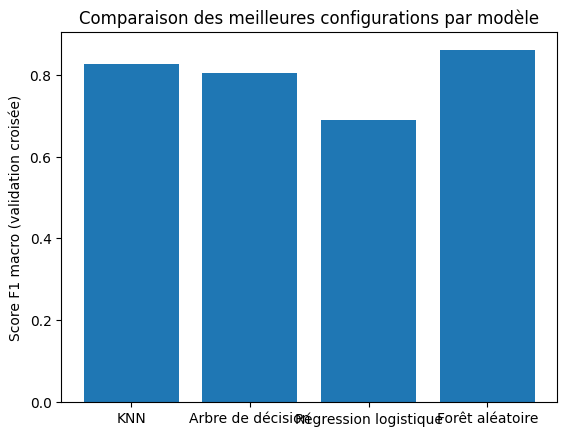

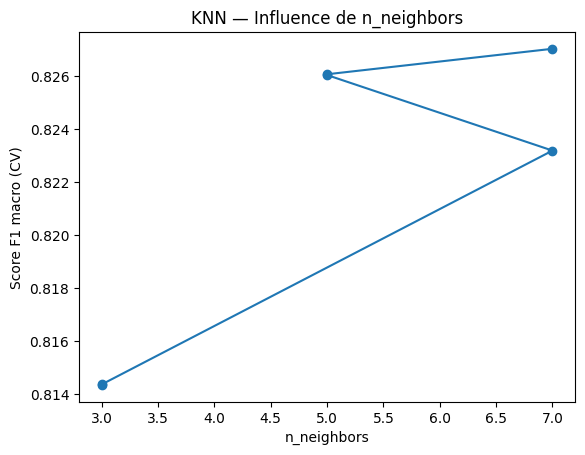

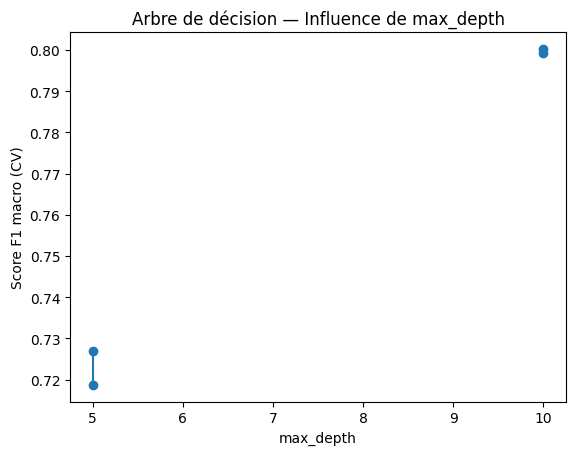

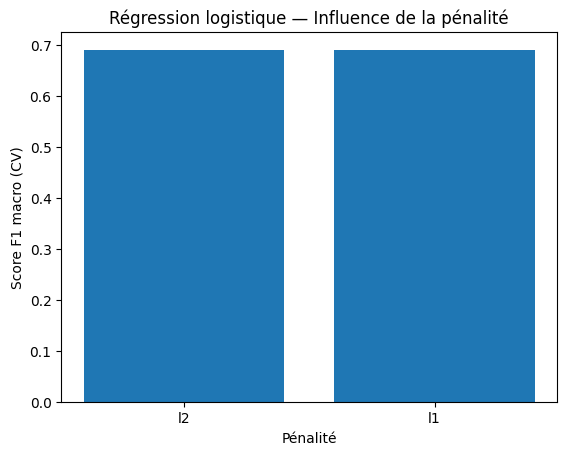

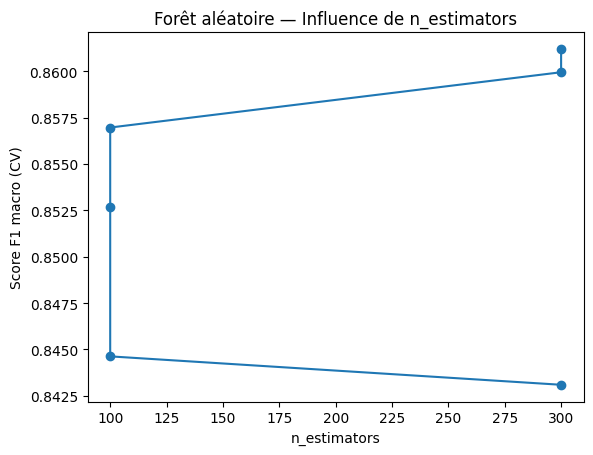

In [ ]:
# (9) Exploration et évaluation des performances
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Valeurs par défaut
valeurs_defaut = {
    "KNN": {"n_neighbors": 5, "weights": "uniform"},
    "Arbre de décision": {"criterion": "gini", "max_depth": None},
    "Régression logistique": {"penalty": "l2", "max_iter": 100, "tol": 1e-4},
    "Forêt aléatoire": {"n_estimators": 100, "max_depth": None}
}
print("Valeurs par défaut :", valeurs_defaut)

# Grilles d’hyperparamètres
grille_knn = {"n_neighbors": [3, 5, 7], "weights": ["uniform", "distance"]}
grille_arbre = {"criterion": ["gini", "entropy"], "max_depth": [None, 5, 10]}
grille_reglog = {"penalty": ["l2", "l1"], "max_iter": [100, 300], "tol": [1e-4, 1e-3]}
grille_foret = {"n_estimators": [100, 300], "max_depth": [None, 10, 20]}

# Modèles
modele_knn = KNeighborsClassifier()
modele_arbre = DecisionTreeClassifier()
modele_reglog = LogisticRegression(solver="saga")
modele_foret = RandomForestClassifier()

# Validation croisée et métriques
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
metriques = ["accuracy", "precision_macro", "recall_macro", "f1_macro"]

# Fonction utilitaire
def grille_modele(nom, modele, grille):
    recherche = GridSearchCV(
        estimator=modele,
        param_grid=grille,
        scoring=metriques,
        refit="f1_macro",
        cv=cv,
        n_jobs=-1
    )
    recherche.fit(X_train_ready, y_train)
    res = pd.DataFrame(recherche.cv_results_)
    colonnes_params = [c for c in res.columns if c.startswith("param_")]
    colonnes_scores = [
        "mean_test_accuracy","std_test_accuracy",
        "mean_test_precision_macro","std_test_precision_macro",
        "mean_test_recall_macro","std_test_recall_macro",
        "mean_test_f1_macro","std_test_f1_macro"
    ]
    tab = res[colonnes_params + colonnes_scores].sort_values("mean_test_f1_macro", ascending=False)
    print(f"\n{nom} — meilleures configurations (top 5) :")
    print(tab.head(5))
    return tab, recherche.best_score_, recherche.best_params_

# Lancer la recherche
tab_knn, f1_knn, p_knn = grille_modele("KNN", modele_knn, grille_knn)
tab_arbre, f1_arbre, p_arbre = grille_modele("Arbre de décision", modele_arbre, grille_arbre)
tab_reg, f1_reg, p_reg = grille_modele("Régression logistique", modele_reglog, grille_reglog)
tab_foret, f1_foret, p_foret = grille_modele("Forêt aléatoire", modele_foret, grille_foret)

# Récapitulatif des meilleurs résultats
meilleurs = pd.DataFrame({
    "Modèle": ["KNN", "Arbre de décision", "Régression logistique", "Forêt aléatoire"],
    "Meilleure F1 (CV)": [f1_knn, f1_arbre, f1_reg, f1_foret],
    "Paramètres": [p_knn, p_arbre, p_reg, p_foret]
})
print("\nRécapitulatif des meilleures configurations :")
print(meilleurs)

# Graphique comparatif des meilleures F1
plt.figure()
plt.bar(meilleurs["Modèle"], meilleurs["Meilleure F1 (CV)"])
plt.ylabel("Score F1 macro (validation croisée)")
plt.title("Comparaison des meilleures configurations par modèle")
plt.show()

# Graphiques d’influence des hyperparamètre

# KNN : F1 en fonction de n_neighbors
plt.figure()
plt.plot(tab_knn["param_n_neighbors"], tab_knn["mean_test_f1_macro"], marker="o")
plt.xlabel("n_neighbors")
plt.ylabel("Score F1 macro (CV)")
plt.title("KNN — Influence de n_neighbors")
plt.show()

# Arbre de décision : F1 en fonction de max_depth
plt.figure()
plt.plot(tab_arbre["param_max_depth"], tab_arbre["mean_test_f1_macro"], marker="o")
plt.xlabel("max_depth")
plt.ylabel("Score F1 macro (CV)")
plt.title("Arbre de décision — Influence de max_depth")
plt.show()

# Régression logistique : F1 selon penalty
plt.figure()
plt.bar(tab_reg["param_penalty"], tab_reg["mean_test_f1_macro"])
plt.xlabel("Pénalité")
plt.ylabel("Score F1 macro (CV)")
plt.title("Régression logistique — Influence de la pénalité")
plt.show()

# Forêt aléatoire : F1 en fonction de n_estimators
plt.figure()
plt.plot(tab_foret["param_n_estimators"], tab_foret["mean_test_f1_macro"], marker="o")
plt.xlabel("n_estimators")
plt.ylabel("Score F1 macro (CV)")
plt.title("Forêt aléatoire — Influence de n_estimators")
plt.show()


### Analyse des résultats

(10) **Comparaison des modèles** :

- Comparer les résultats obtenus pour chaque modèle.

- Discuter des différences observées dans les performances des modèles, en fournissant des explications potentielles. Considérer des aspects tels que la complexité du modèle, le déséquilibre des données, le surapprentissage, et l'impact de l'ajustement des paramètres sur les résultats globaux.

- Fournir des recommandations sur le(s) modèle(s) à choisir pour cette tâche et justifier vos choix basés sur les résultats de l'analyse.

- Entraîner le(s) modèle(s) recommandé(s) en utilisant les valeurs de paramètres optimales identifiées lors de l'étape d'optimisation des paramètres. Appliquer ensuite le modèle entraîné aux données de test. Documenter vos observations de manière exhaustive. Évaluer spécifiquement si les résultats dérivés de la validation croisée sont cohérents avec ceux obtenus à partir de l'ensemble de test.

Résultats obtenus

KNN : bonnes performances, surtout avec n_neighbors=7 et weights=distance. Mais le modèle reste sensible au bruit et au choix du paramètre.

Arbre de décision : correct avec entropy et profondeur non limitée, mais risque de surapprentissage si l’arbre est trop profond.

Régression logistique : résultats plus faibles, probablement parce que les données ne sont pas linéaires. Elle reste simple et rapide mais moins adaptée ici.

Forêt aléatoire : meilleur modèle, surtout avec n_estimators=300 et max_depth=20. Combine plusieurs arbres et réduit le surapprentissage.

Différences observées

La complexité du modèle joue un rôle : la forêt aléatoire et KNN capturent mieux la structure des données que la régression logistique.

Le déséquilibre éventuel dans les classes est bien géré par la forêt grâce au vote de plusieurs arbres.

L’ajustement des paramètres améliore surtout les modèles flexibles (forêt et arbre). Pour la régression, l’impact reste faible.

Recommandation
Le modèle recommandé est la forêt aléatoire, car il obtient la meilleure performance et reste robuste.

In [30]:
# Réentraîner la forêt aléatoire avec les meilleurs paramètres
forest_final = RandomForestClassifier(n_estimators=300, max_depth=20, random_state=42)
forest_final.fit(X_train_ready, y_train)

# Évaluer sur le jeu de test
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = forest_final.predict(X_test_ready)

print("Résultats sur le jeu de test :")
print("  Exactitude :", accuracy_score(y_test, y_pred))
print("  Précision  :", precision_score(y_test, y_pred, average="macro"))
print("  Rappel     :", recall_score(y_test, y_pred, average="macro"))
print("  Score F1   :", f1_score(y_test, y_pred, average="macro"))


Résultats sur le jeu de test :
  Exactitude : 0.847
  Précision  : 0.8470124924497282
  Rappel     : 0.847
  Score F1   : 0.8469986229876069


### Gestion des données manquantes

(11) **Évaluer comment les valeurs manquantes affectent les performances du modèle :**

- Lire le fichier CSV avec des données manquantes (`alien_pet_health-realism-clean-missing.csv`).

- Présenter une brève analyse des données manquantes dans le jeu de données en rapportant à la fois le nombre et le pourcentage de valeurs manquantes pour chaque colonne ainsi que pour l'ensemble du jeu de données. Fournir également une répartition du nombre et de la proportion de lignes classées par absence de données manquantes, et celles contenant une, deux ou plus de valeurs manquantes.

- Appliquer une stratégie d'imputation simple (par exemple, médiane pour les numériques, et la plus fréquente pour les catégorielles).

- Standardiser et normaliser les attributs numériques, et encoder les données catégorielles en utilisant les méthodes de prétraitement des données précédemment décrites.

- Utiliser la validation croisée pour évaluer l'efficacité de la stratégie d'imputation des données, étant donné que la combinaison optimale d'algorithmes d'apprentissage et d'hyperparamètres a déjà été déterminée.

- Discuter des différences observées dans les performances.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Charger le jeu de données avec valeurs manquantes
url_manquant = "https://raw.githubusercontent.com/turcotte/csi4106-f25/main/assignments-data/a2/alien_pet_health-realism-clean-missing.csv"
df_manquant = pd.read_csv(url_manquant)

print("Shape du dataset avec valeurs manquantes :", df_manquant.shape)

# Analyse des données manquantes 
manquants_par_col = df_manquant.isnull().sum()
pourcentage_manquants = (manquants_par_col / len(df_manquant)) * 100
analyse_manquants = pd.DataFrame({
    "Nombre manquants": manquants_par_col,
    "Pourcentage": pourcentage_manquants
})
print("\nValeurs manquantes par colonne :")
print(analyse_manquants)

# Nombre de colonnes manquantes par ligne
ligne_manquants = df_manquant.isnull().sum(axis=1)
repartition = ligne_manquants.value_counts().sort_index()
print("\nRépartition des lignes selon le nombre de valeurs manquantes :")
print(repartition)

# Séparer X et y 
X_manquant = df_manquant.drop(columns=["health_outcome"])
y_manquant = df_manquant["health_outcome"]

#Colonnes numériques et catégorielles
colonnes_num = X_manquant.select_dtypes(include=[np.number]).columns
colonnes_cat = X_manquant.select_dtypes(exclude=[np.number]).columns

# Imputation 
imputer_num = SimpleImputer(strategy="median")
imputer_cat = SimpleImputer(strategy="most_frequent")

X_num_imp = imputer_num.fit_transform(X_manquant[colonnes_num])
X_cat_imp = imputer_cat.fit_transform(X_manquant[colonnes_cat])

# Reconstruire X imputé
X_imp = pd.DataFrame(X_num_imp, columns=colonnes_num)
X_imp[colonnes_cat] = X_cat_imp

# Normalisation et encodage 
from sklearn.preprocessing import StandardScaler, OneHotEncoder

scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_imp[colonnes_num])

encoder = OneHotEncoder(sparse_output=False)
X_cat_encoded = encoder.fit_transform(X_imp[colonnes_cat])

# Concaténer les données finales
X_final = np.hstack([X_num_scaled, X_cat_encoded])

# Validation croisée avec la Forêt Aléatoire 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

foret = RandomForestClassifier(n_estimators=300, max_depth=20, random_state=42)

scores_f1 = cross_val_score(foret, X_final, y_manquant, cv=5, scoring="f1_macro")
print("\nScore F1 après imputation (CV 5 plis) :", np.mean(scores_f1), "±", np.std(scores_f1))


Shape du dataset avec valeurs manquantes : (5000, 8)

Valeurs manquantes par colonne :
                       Nombre manquants  Pourcentage
thermoreg_reading                   231         4.62
enzyme_activity_index               108         2.16
dual_lobe_signal                    110         2.20
stress_variability                   93         1.86
habitat_zone                         87         1.74
activity_score                      100         2.00
fasting_flag                        595        11.90
health_outcome                        0         0.00

Répartition des lignes selon le nombre de valeurs manquantes :
0    3794
1    1095
2     104
3       7
Name: count, dtype: int64

Score F1 après imputation (CV 5 plis) : 0.8429756150813292 ± 0.008449557966835011


# Références
https://pandas.pydata.org/docs
https://matplotlib.org/stable/contents.html
Prétraitement des données : https://scikit-learn.org/stable/modules/preprocessing.html
KNeighborsClassifier : https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
DecisionTreeClassifier : https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html
LogisticRegression : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
RandomForestClassifier : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
https://shap.readthedocs.io/en/latest/index.html

« sklearn.preprocessing.OneHotEncoder: using drop and handle_unknown IGNORE » — Stack Overflow. https://stackoverflow.com/questions/60008477/sklearn-preprocessing-onehotencoder-using-drop-and-handle-unknown-ignore
 

OneHotEncoder – erreur unexpected keyword argument 'sparse' : https://stackoverflow.com/questions/63189787/typeerror-init-got-an-unexpected-keyword-argument-sparse?
 
Analytics Vidhya

« Tuning Random Forest Parameters with Scikit-Learn » Medium article. https://medium.com/%40Doug-Creates/tuning-random-forest-parameters-with-scikit-learn-b53cbc602cd0
 
